In [15]:
#algoritmo para treinar

from sklearn import datasets, svm
from sklearn.preprocessing import StandardScaler
import pandas as pa

conj = datasets.load_iris()

elementos = conj['data'][:, (1,3)]
previsores = conj['target']
previsores_nomeados = [conj['target_names'][t] for t in previsores]

nomes_atributos = {
    'x': 'largura das Sépalas em CM',
    'y': 'largura das Pétalas em CM'
}

transformador = StandardScaler()
transformador.fit(elementos)
XT = transformador.transform(elementos)

dataframeTransformed = pa.DataFrame(data=XT, columns=nomes_atributos.values())
dataframeTransformed['Espécie'] = previsores_nomeados

modeloAlgoritmo = svm.LinearSVC(C=1, loss='hinge')
modeloAlgoritmo.fit(elementos, previsores)
prevs_m = modeloAlgoritmo.predict(XT)


c:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Uma maneira comum de analisar os resultados de um modelo de classificação é comparar as previsões feitas pelo modelo com as classes reais do conjunto de dados. Aqui estão algumas sugestões de como você pode visualizar e analisar melhor os resultados:

Matriz de Confusão: Uma matriz de confusão mostra o número de previsões corretas e incorretas feitas pelo modelo para cada classe. Você pode usar a função confusion_matrix do sklearn.metrics para calcular a matriz de confusão e, em seguida, exibi-la graficamente.

Acurácia do Modelo: A acurácia do modelo é a proporção de previsões corretas feitas pelo modelo. Você pode calcular a acurácia usando a função accuracy_score do sklearn.metrics.

Visualização das Previsões: Você pode plotar as previsões feitas pelo modelo em um gráfico para visualizar como elas se comparam às classes reais. Por exemplo, você pode usar um gráfico de dispersão onde cada ponto representa uma amostra do conjunto de dados e sua cor indica a classe prevista pelo modelo.

Visualização das Regiões de Decisão: Se estiver trabalhando com um modelo de classificação que seja capaz de traçar fronteiras de decisão, como SVM, você pode visualizar as regiões de decisão para entender como o modelo está separando as classes no espaço de características.

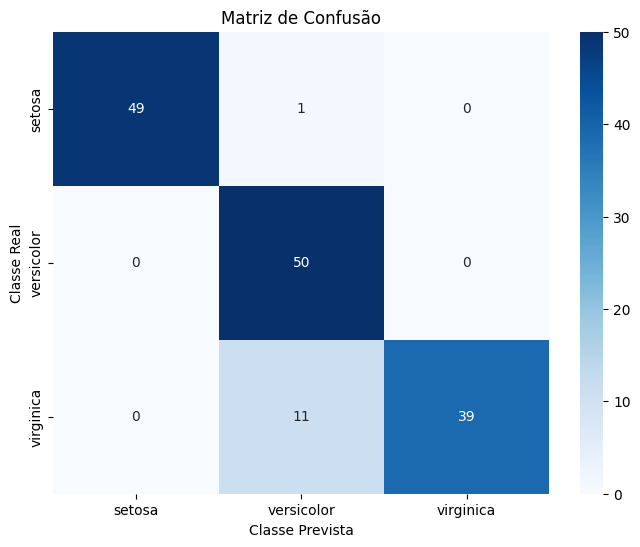

Acurácia do modelo: 0.92


In [16]:
#algoritmo para apresentar

from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Calcula a matriz de confusão
cm = confusion_matrix(previsores, prevs_m)

# Calcula a acurácia do modelo
acc = accuracy_score(previsores, prevs_m)

# Exibe a matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=conj['target_names'], yticklabels=conj['target_names'])
plt.xlabel('Classe Prevista')
plt.ylabel('Classe Real')
plt.title('Matriz de Confusão')
plt.show()

# Exibe a acurácia do modelo
print(f'Acurácia do modelo: {acc:.2f}')

Visualização das Previsões: Podemos criar um gráfico de dispersão onde cada ponto representa uma amostra do conjunto de dados, sua cor indica a classe prevista pelo modelo e a forma do ponto indica a classe real.

Visualização das Regiões de Decisão: Como você está usando um modelo SVM linear, podemos plotar as regiões de decisão para visualizar como o modelo está separando as classes no espaço de características.

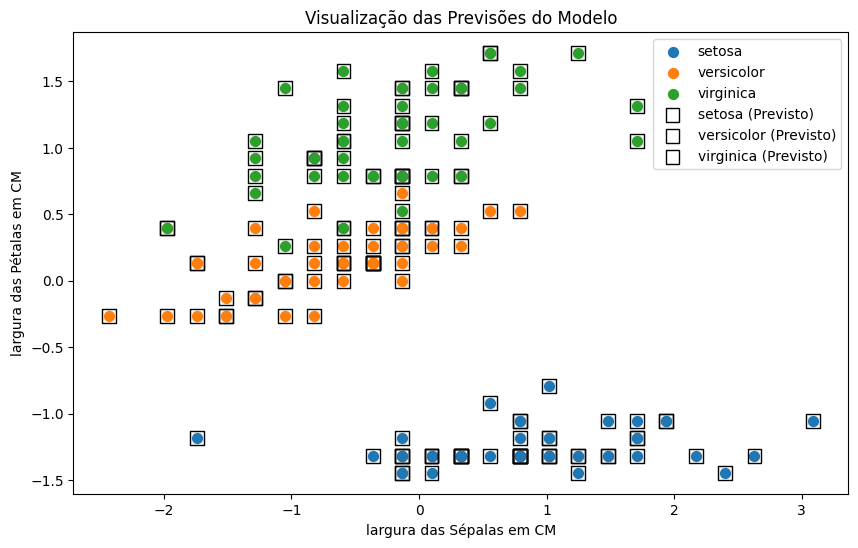

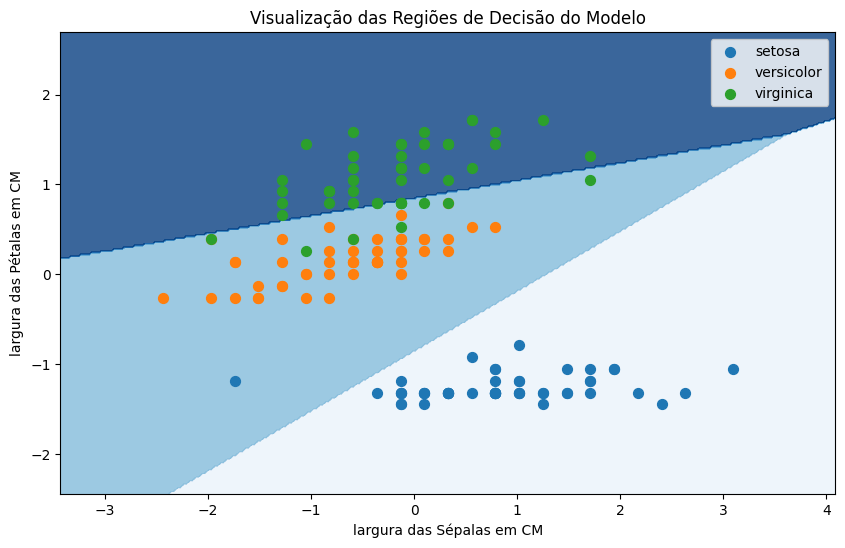

In [17]:
# Visualização das Previsões
plt.figure(figsize=(10, 6))
for i, target_name in enumerate(conj['target_names']):
    plt.scatter(XT[previsores == i, 0], XT[previsores == i, 1], label=target_name, marker='o', s=50)

for i, target_name in enumerate(conj['target_names']):
    plt.scatter(XT[prevs_m == i, 0], XT[prevs_m == i, 1], facecolors='none', edgecolors='black', label=f'{target_name} (Previsto)', marker='s', s=100)

plt.xlabel(nomes_atributos['x'])
plt.ylabel(nomes_atributos['y'])
plt.title('Visualização das Previsões do Modelo')
plt.legend()
plt.show()

# Visualização das Regiões de Decisão
plt.figure(figsize=(10, 6))
h = .02  # step size in the mesh
x_min, x_max = XT[:, 0].min() - 1, XT[:, 0].max() + 1
y_min, y_max = XT[:, 1].min() - 1, XT[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = modeloAlgoritmo.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Blues, alpha=0.8)

# Plot das amostras
for i, target_name in enumerate(conj['target_names']):
    plt.scatter(XT[previsores == i, 0], XT[previsores == i, 1], label=target_name, marker='o', s=50)

plt.xlabel(nomes_atributos['x'])
plt.ylabel(nomes_atributos['y'])
plt.title('Visualização das Regiões de Decisão do Modelo')
plt.legend()
plt.show()

Várias razões podem levar a baixas acurácias em um modelo de classificação. Aqui estão algumas possíveis causas:

Dados de treinamento inadequados: Se os dados de treinamento não representam bem a distribuição dos dados reais ou se são muito poucos para capturar a complexidade do problema, o modelo pode não aprender adequadamente.

Características irrelevantes ou redundantes: Se as características usadas para treinar o modelo não estão diretamente relacionadas à variável de saída ou se existem características redundantes, o modelo pode ter dificuldade em aprender padrões significativos nos dados.

Sobreajuste (Overfitting): Isso ocorre quando o modelo se ajusta demais aos dados de treinamento e não generaliza bem para novos dados. O modelo pode memorizar os dados de treinamento em vez de aprender padrões gerais, resultando em baixo desempenho em dados não vistos.

Subajuste (Underfitting): Isso ocorre quando o modelo é muito simples para capturar a estrutura dos dados. O modelo pode não ser flexível o suficiente para aprender padrões complexos nos dados de treinamento, resultando em baixa capacidade de generalização.

Desbalanceamento de classes: Se as classes no conjunto de dados não estão representadas igualmente, o modelo pode ter dificuldade em aprender padrões para classes minoritárias e acabar favorecendo as classes majoritárias.

Hiperparâmetros inadequados: Os hiperparâmetros do modelo, como taxa de aprendizado, regularização, profundidade da árvore, etc., podem não estar ajustados corretamente. Hiperparâmetros mal ajustados podem levar a um desempenho inferior do modelo.

Erros nos dados: Dados rotulados incorretamente, outliers ou dados ruidosos podem afetar negativamente o desempenho do modelo.

A seleção de características é uma etapa crucial no desenvolvimento de modelos de aprendizado de máquina, e a escolha das características certas pode ter um grande impacto no desempenho do modelo. Aqui estão algumas técnicas comuns para selecionar características:

Análise exploratória de dados (EDA): Comece explorando e entendendo seus dados. Visualize as relações entre as características e a variável de saída. Identifique quais características podem ter uma forte correlação com a variável de saída.

Correlação: Calcule a matriz de correlação entre as características e a variável de saída. Características com alta correlação com a variável de saída são geralmente boas candidatas para inclusão no modelo.

Engenharia de características: Crie novas características que possam ser mais informativas para o problema em questão. Isso pode envolver combinar ou transformar características existentes de maneiras significativas.

Seleção baseada em modelo: Use métodos que utilizam o modelo de aprendizado de máquina para avaliar a importância das características. Algoritmos como árvores de decisão e modelos lineares podem fornecer informações sobre a importância das características para o modelo.

Seleção univariada: Realize testes estatísticos univariados, como ANOVA ou teste t de Student, para selecionar características que tenham uma relação estatisticamente significativa com a variável de saída.

Seleção recursiva de características: Use métodos como RFE (Eliminação Recursiva de Características) que removem recursivamente as características menos importantes até que o melhor subconjunto de características seja alcançado.

Regularização: Alguns modelos, como regressão logística e SVM, têm termos de regularização que penalizam características menos importantes. Ajustar o parâmetro de regularização pode ajudar a selecionar automaticamente as características mais relevantes.

A escolha das características depende do conhecimento do domínio, da natureza dos dados e do objetivo do modelo. É uma prática comum experimentar várias abordagens e técnicas de seleção de características para encontrar as mais adequadas para o problema em questão. Além disso, é importante ter em mente que a seleção de características é um processo iterativo e que pode ser necessário ajustar e refinar as características à medida que você avalia o desempenho do modelo.